In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import json

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [7.0, 5.0]
plt.rcParams['figure.dpi'] = 100
%matplotlib notebook

In [2]:
country_name = "srilanka";
dir_path = "../C++/build/release/results/" + country_name + "_2layer_14d_iter5k_pass100_constant/";
true_data = pd.read_csv(dir_path + country_name + ".txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
print(true_data)

start_date_map = {
    "india"         : "2020-01-30",
    "southafrica"   : "2020-03-01",
    "srilanka"      : "2020-10-01",
    "unitedkingdom" : "2020-01-31",
    "unitedstates"  : "2020-01-22",
}

start_date = datetime.strptime(start_date_map[country_name], "%Y-%m-%d")
print(start_date_map[country_name])

     confirmed  recovered  deaths
0         3382          0      13
1         3388          0      13
2         3395          0      13
3         3402          0      13
4         3513          0      13
..         ...        ...     ...
511     641786          0   16116
512     643072          0   16142
513     644060          0   16166
514     645037          0   16190
515     646034          0   16222

[516 rows x 3 columns]
2020-10-01


In [3]:
smoothed_data = pd.read_csv(dir_path + country_name + "_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth', 'vaccine_smooth', 'tests_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
smoothed_data

,confirmed_true,deaths_true,confirmed_smooth,deaths_smooth,vaccine_smooth,tests_smooth
0,3382,13,3382,13,0,291105
1,3388,13,3388,13,0,293262
2,3395,13,3416,13,0,294980
3,3402,13,3684,13,0,298181
4,3513,13,3842,13,0,301425
...,...,...,...,...,...,...
511,641786,16116,641696,16111,14133808,7342234
512,643072,16142,642838,16140,14146142,7351661
513,644060,16166,643998,16167,14158424,7361532
514,645037,16190,645044,16193,14163086,7370759


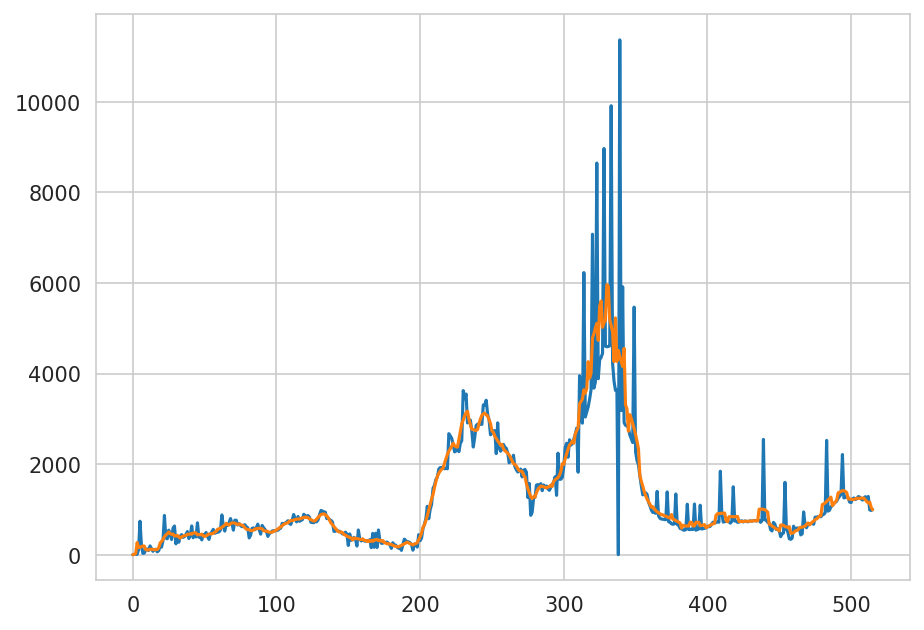

In [4]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

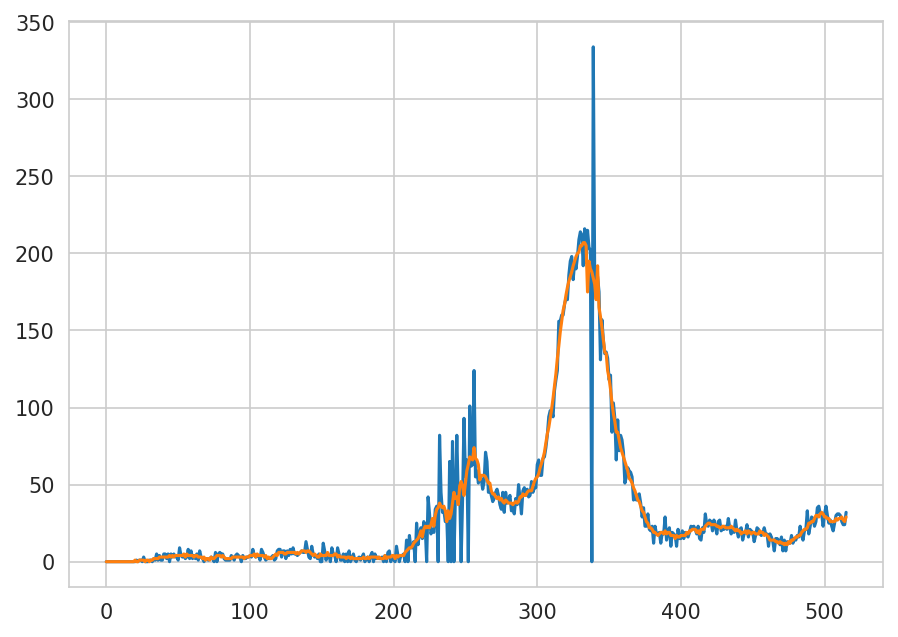

In [5]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

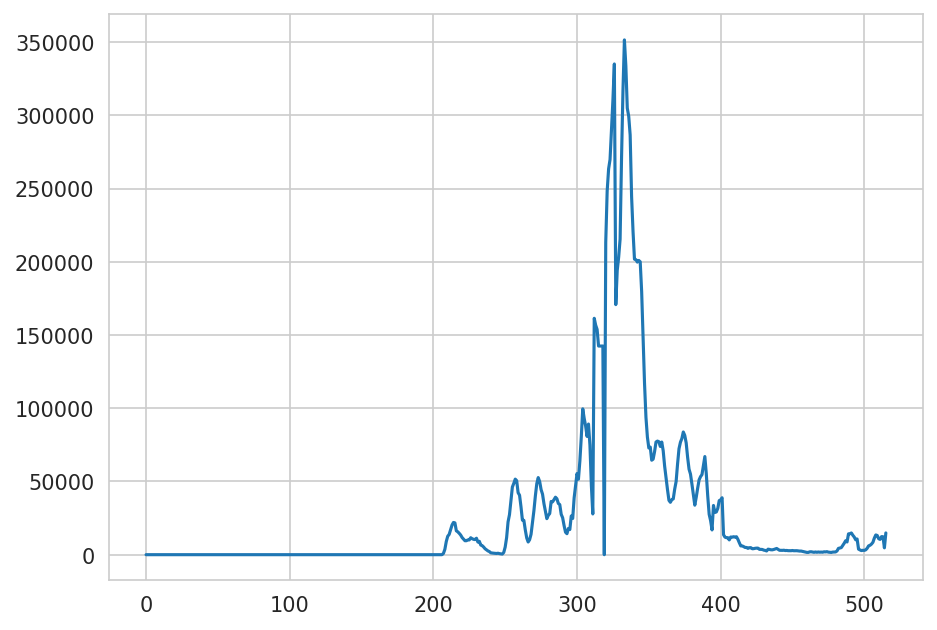

In [6]:
plt.figure()
plt.plot(diff_data['vaccine_smooth'])
plt.show()

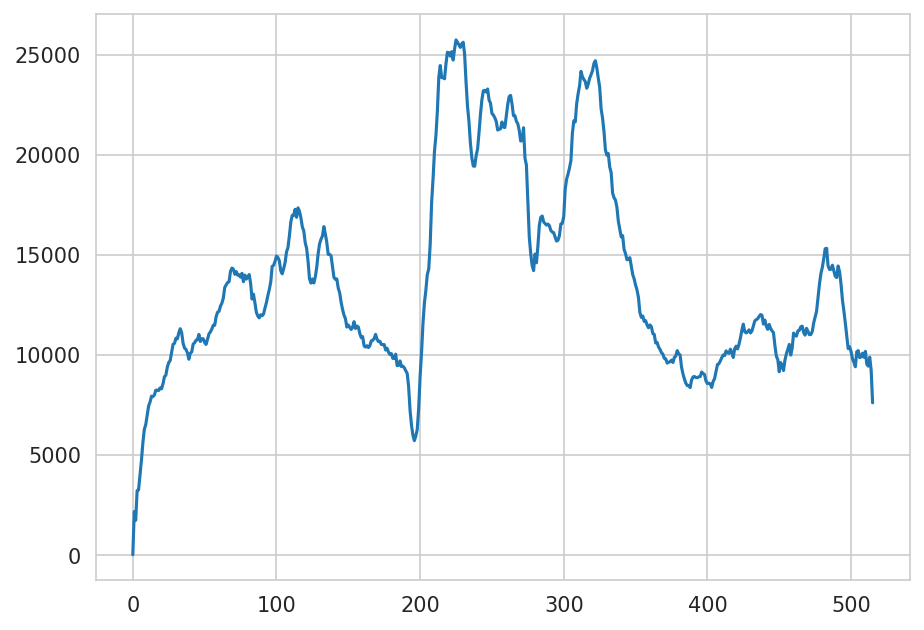

In [7]:
plt.figure()
plt.plot(diff_data['tests_smooth'])
plt.show()

In [8]:
pred_data = pd.read_csv(dir_path + country_name + "_prediction_seed1.txt", \
                        skipinitialspace=True)
# print("pred_data:\n", pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv(dir_path + country_name + "_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
#print(param_data)

beta = param_data.loc[0:num_days-1]
IFR  = param_data.loc[num_days:2*num_days-1]

num_sol_to_plot = min(20, len(param_data.columns));

T_incub = param_data.loc[param_data.index[-7]]
T_recov = param_data.loc[param_data.index[-6]]
beta_test_scaling = param_data.loc[param_data.index[-5]]
beta_vac_scaling = param_data.loc[param_data.index[-4]]
vaccine_alpha = param_data.loc[param_data.index[-3]]
IFR_scaling = param_data.loc[param_data.index[-2]]
#print("Vaccine effectiveness:\n",vaccine_eff)

print("T_incub:\n", T_incub)
print("T_recov:\n", T_recov)
print("beta_test_scaling:\n", beta_test_scaling)
print("beta_vac_scaling:\n", beta_vac_scaling)
print("vaccine_alpha:\n", vaccine_alpha)
print("IFR_scaling:\n", IFR_scaling)

optimal_params = {
    "beta": beta[0].tolist(),
    "IFR"  : IFR[0].tolist(),
    "T_incub": T_incub[0],
    "T_recov": T_recov[0],
    "beta_test_scaling": beta_test_scaling[0],
    "beta_vac_scaling": beta_vac_scaling[0],
    "vaccine_alpha": vaccine_alpha[0],
    "IFR_scaling": IFR_scaling[0]
}

#Write optimal parameters as JS variable
opt_param_json_file = open("optimal_parameters.js", "w")
opt_param_json_file.write("let optimal_model_params = ")
json.dump(optimal_params, opt_param_json_file)
opt_param_json_file.close()

error = param_data.loc[param_data.index[-1]]
error_plot = error[0:num_sol_to_plot]
print("Error:\n",error)

scaled_error = (np.log(error_plot) - np.log(min(error_plot))) / (np.log(max(error_plot)) - np.log(min(error_plot))) * 0.9
print("Scaled error:\n", scaled_error)
grey_colors = np.tile(scaled_error,[3,1]).transpose();

# grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
grey_colors[0] = [0.24, 0.63, 0.93] #Change color of best result to blue
print("Grey colors:\n", grey_colors)
# plt.figure()
# ax = sns.heatmap(np.random.rand(30,30))
# ax.pcolor(np.random.rand(30,30),cmap=grey_colormap)
# plt.show()

dates = [];
for i in range(0,num_days):
    dates.append(start_date + timedelta(days=i))

locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

Num days: 516
T_incub:
 0     7.909006
1     4.315327
2     4.587154
3     8.966695
4     9.105240
        ...   
95    4.326181
96    3.446526
97    2.850669
98    2.593563
99    5.815842
Name: 1032, Length: 100, dtype: float64
T_recov:
 0     14.000000
1     13.749660
2     13.564820
3     14.000000
4     13.449250
        ...    
95     5.847245
96     5.330455
97     5.436368
98     5.075899
99     6.390141
Name: 1033, Length: 100, dtype: float64
beta_test_scaling:
 0     1.000000
1     0.900941
2     1.000000
3     1.000000
4     0.836520
        ...   
95    0.241258
96    0.282504
97    0.402187
98    0.753855
99    0.152131
Name: 1034, Length: 100, dtype: float64
beta_vac_scaling:
 0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
        ...   
95    0.949938
96    0.962871
97    0.787581
98    0.374616
99    0.023169
Name: 1035, Length: 100, dtype: float64
vaccine_alpha:
 0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
     

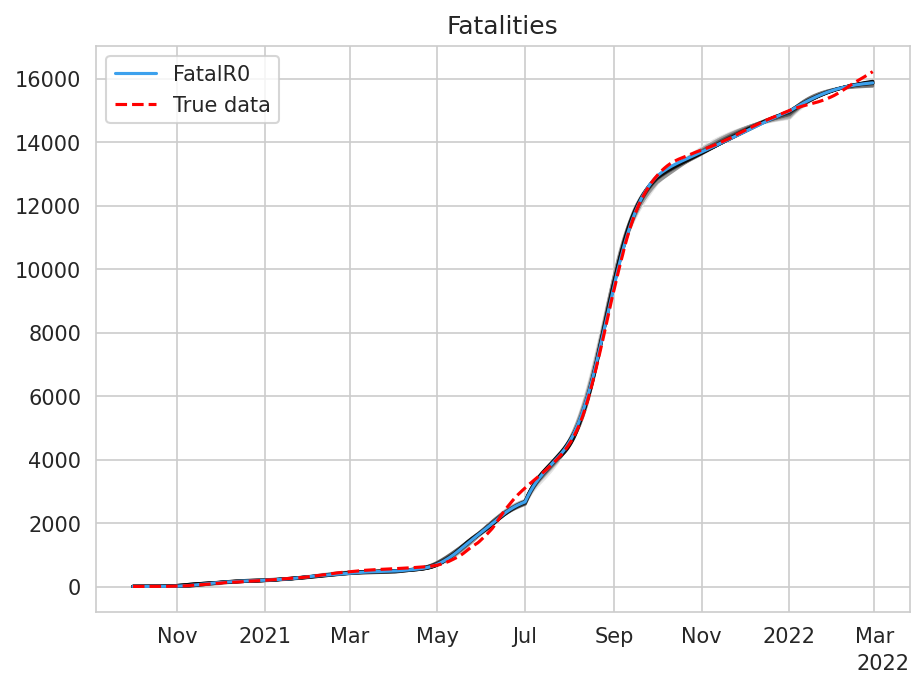

In [9]:
pred_fatal = pred_data.filter(regex=("FatalR.*"))

fig = plt.figure()

for i in range(num_sol_to_plot-1,0,-1):
    plt.plot(dates,pred_fatal["FatalR"+str(i)], color=grey_colors[i])
plt.plot(dates,pred_fatal["FatalR"+str(0)], color=grey_colors[0], label=pred_fatal.columns[0])
    
plt.plot(dates,smoothed_data["deaths_smooth"],'r--',label='True data')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
# labels = pred_fatal.columns[0:num_sol_to_plot][::-1].tolist();
# labels.append("True data");
plt.legend(loc='upper left')
plt.title('Fatalities')
plt.show()


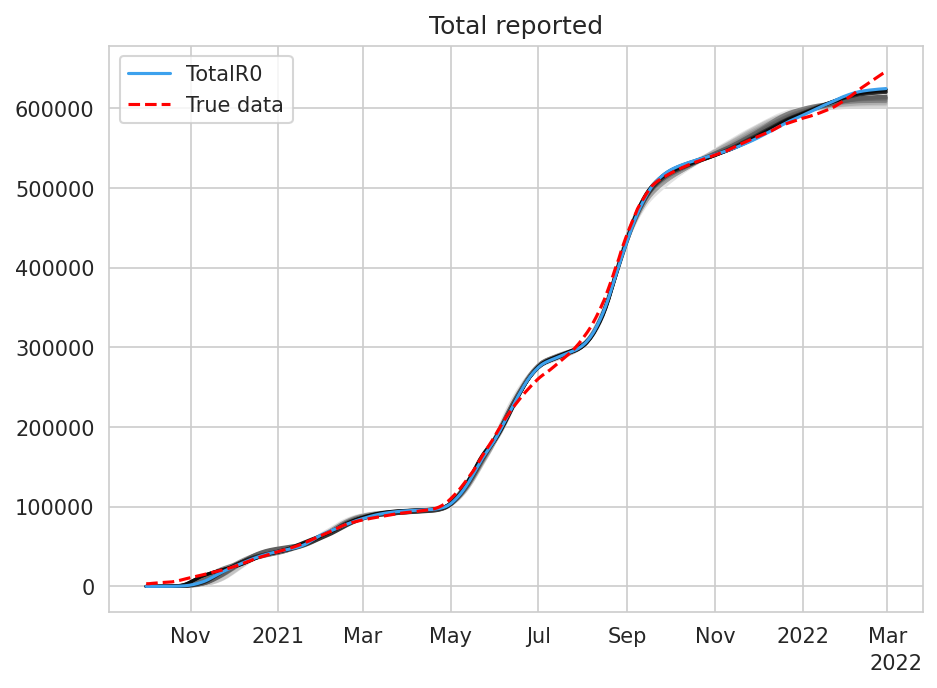

In [10]:
pred_reported = pred_data.filter(regex=("TotalR.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,0,-1):
    plt.plot(dates, pred_reported["TotalR"+str(i)], color=grey_colors[i])
plt.plot(dates, pred_reported["TotalR"+str(0)], color=grey_colors[0], label=pred_reported.columns[0])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["confirmed_smooth"],'r--',label='True data')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
# labels.append("True data");
plt.legend(loc='upper left')
plt.title('Total reported')
plt.show()

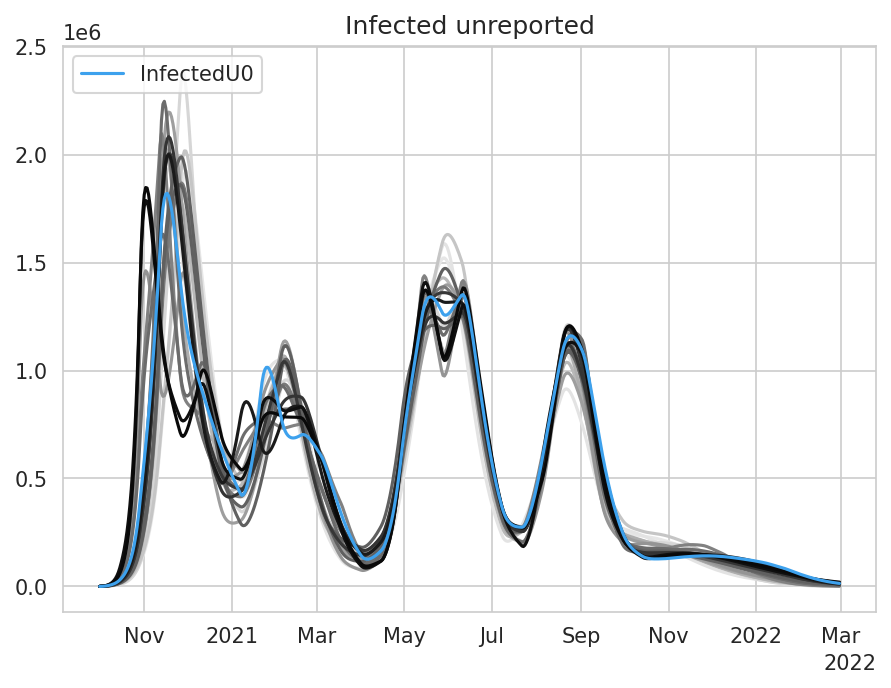

In [11]:
pred_reported = pred_data.filter(regex=("InfectedU.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,0,-1):
    plt.plot(dates, pred_reported["InfectedU"+str(i)], color=grey_colors[i])
plt.plot(dates, pred_reported["InfectedU"+str(0)], color=grey_colors[0], label=pred_reported.columns[0])

# plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
# labels.append("True data");
plt.legend(loc='upper left')
plt.title('Infected unreported')
plt.show()

      TotalVac0   TotalVac1   TotalVac2   TotalVac3   TotalVac4   TotalVac5  \
0           0.0         0.0         0.0         0.0         0.0         0.0   
1           0.0         0.0         0.0         0.0         0.0         0.0   
2           0.0         0.0         0.0         0.0         0.0         0.0   
3           0.0         0.0         0.0         0.0         0.0         0.0   
4           0.0         0.0         0.0         0.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
511  14123381.0  14123381.0  14123381.0  14123381.0  14123381.0  14123381.0   
512  14133808.0  14133808.0  14133808.0  14133808.0  14133808.0  14133808.0   
513  14146142.0  14146142.0  14146142.0  14146142.0  14146142.0  14146142.0   
514  14158424.0  14158424.0  14158424.0  14158424.0  14158424.0  14158424.0   
515  14163086.0  14163086.0  14163086.0  14163086.0  14163086.0  14163086.0   

      TotalVac6   TotalVac7   TotalVac8   TotalVac9

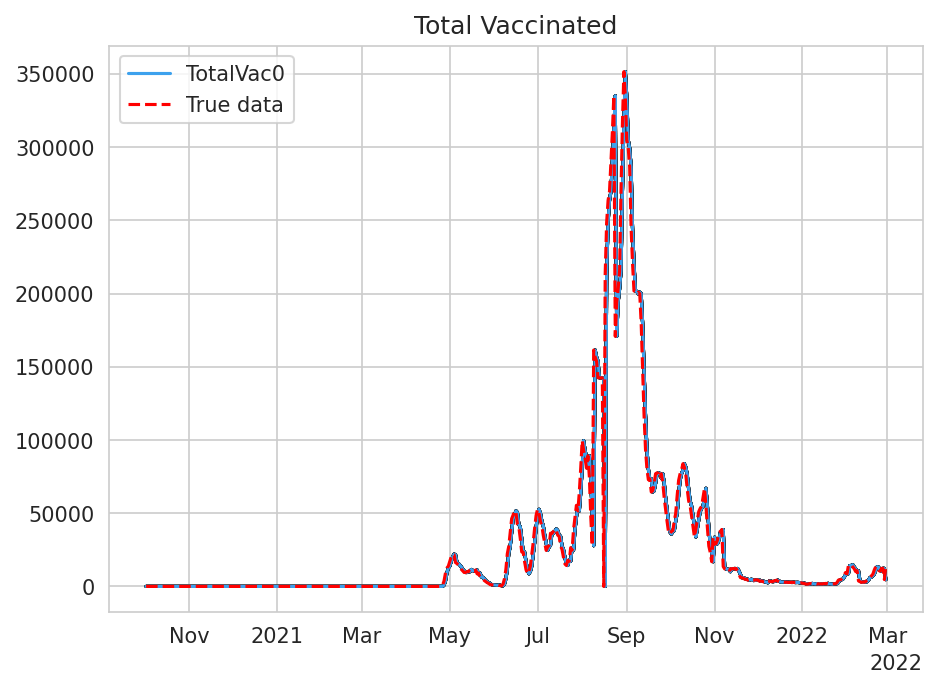

In [12]:
pred_vaccine = pred_data.filter(regex=("TotalVac.*"))
print(pred_vaccine)

plt.figure()

for i in range(num_sol_to_plot-1,0,-1):
    plt.plot(dates, pred_vaccine["TotalVac"+str(i)].diff(), color=grey_colors[i])
plt.plot(dates, pred_vaccine["TotalVac"+str(0)].diff(), color=grey_colors[0], label=pred_vaccine.columns[0])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["vaccine_smooth"].diff(),'r--',label='True data')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# labels = pred_vaccine.columns[0:num_sol_to_plot][::-1].tolist();
# labels.append("True data");
plt.legend(loc='upper left')
plt.title('Total Vaccinated')
plt.show()

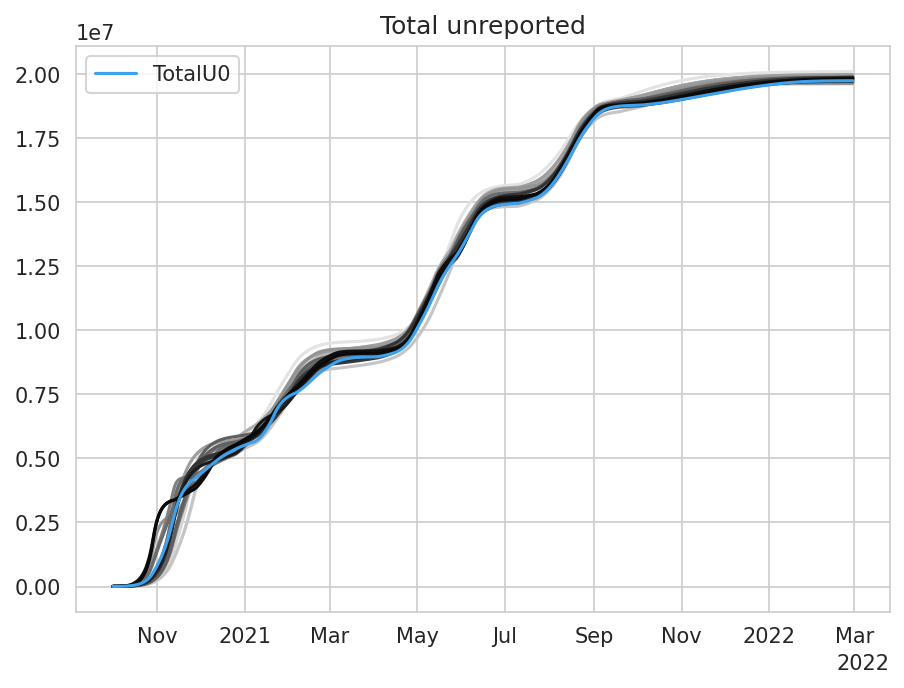

In [13]:
pred_unreported = pred_data.filter(regex=("TotalU.*"))
# print(pred_unreported)

plt.figure()

for i in range(num_sol_to_plot-1,0,-1):
    plt.plot(dates, pred_unreported["TotalU"+str(i)], color=grey_colors[i])
plt.plot(dates, pred_unreported["TotalU"+str(0)], color=grey_colors[0], label=pred_unreported.columns[0])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# labels = pred_unreported.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(loc='upper left')
plt.title('Total unreported')
plt.show()

        Reff0     Reff1      Reff2     Reff3     Reff4     Reff5     Reff6  \
0    9.947244  9.289957  10.502135  9.992393  9.580754  9.614433  9.111105   
1    9.946153  9.287828  10.500869  9.991293  9.577807  9.613392  9.106521   
2    9.945049  9.287144  10.499508  9.990189  9.577348  9.612352  9.106684   
3    9.943851  9.285192  10.497894  9.989008  9.574992  9.611248  9.103302   
4    9.942488  9.283824  10.495875  9.987685  9.573906  9.610023  9.102476   
..        ...       ...        ...       ...       ...       ...       ...   
511  0.133828  0.393676   0.502887  0.122963  0.327321  0.192189  0.241765   
512  0.132969  0.391065   0.498982  0.122202  0.325576  0.190835  0.240823   
513  0.132474  0.389404   0.496677  0.121758  0.324045  0.190088  0.239745   
514  0.138950  0.406684   0.521367  0.127626  0.338679  0.200457  0.248623   
515  0.134246  0.394371   0.502460  0.123393  0.329741  0.192667  0.244326   

        Reff7     Reff8     Reff9  ...    Reff90    Reff91    R

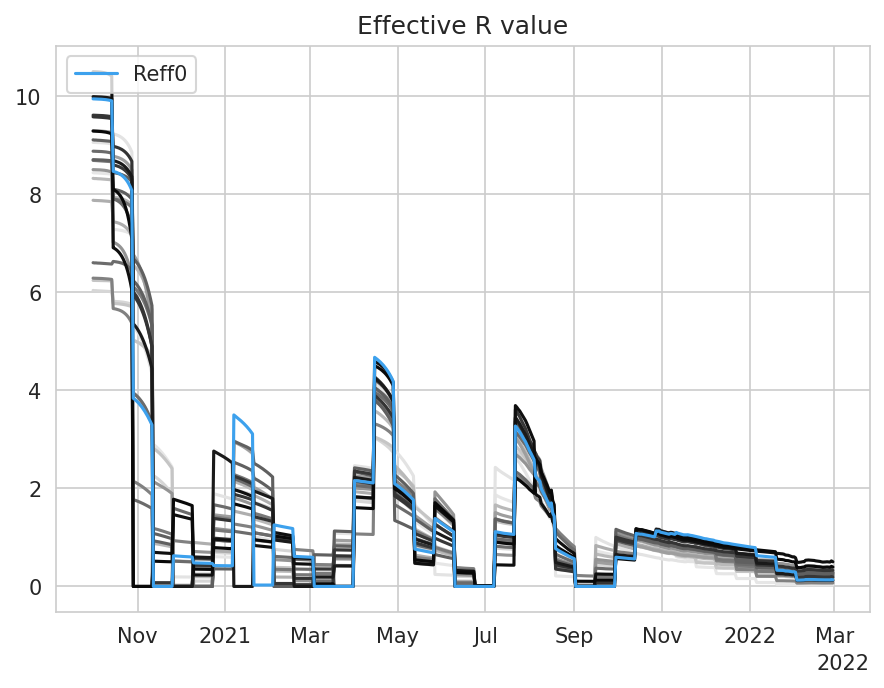

/home/savithru/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


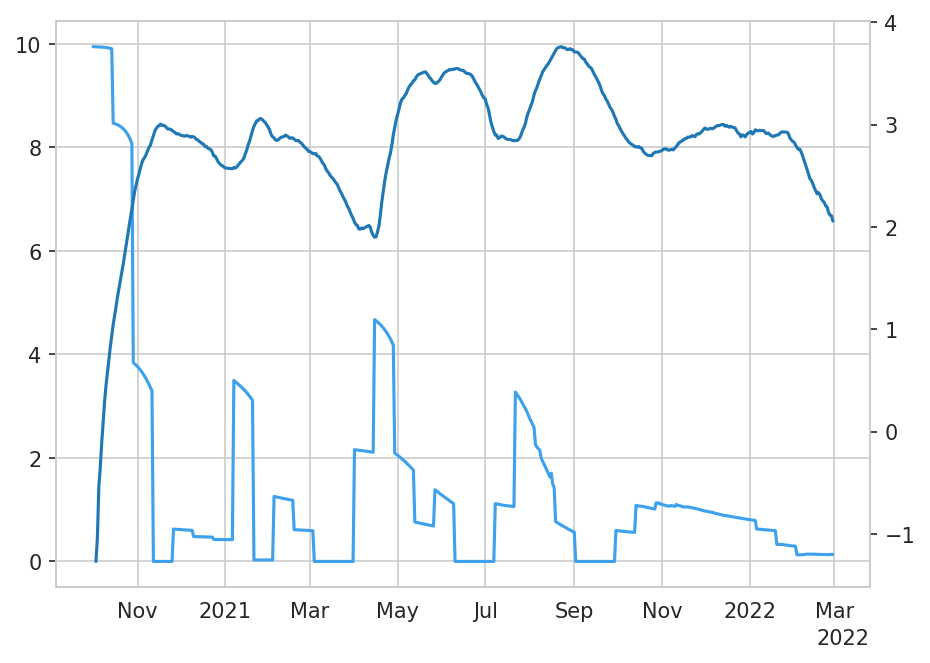

In [14]:
pred_Reff = pred_data.filter(regex=("Reff.*"))
pred_reported = pred_data.filter(regex=("TotalR.*"))
print(pred_Reff)

plt.figure()

for i in range(num_sol_to_plot-1,0,-1):
    plt.plot(dates, pred_Reff["Reff"+str(i)], color=grey_colors[i])
plt.plot(dates, pred_Reff["Reff"+str(0)], color=grey_colors[0], label=pred_Reff.columns[0])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# labels = pred_Reff.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(loc='upper left')
plt.title('Effective R value')
plt.show()

plt.figure()
plt.plot(dates, pred_Reff["Reff0"], color=grey_colors[0])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.plot(dates, np.log10(pred_reported["TotalR0"].diff()))
ax2.grid(None)
plt.show()

<IPython.core.display.Javascript object>


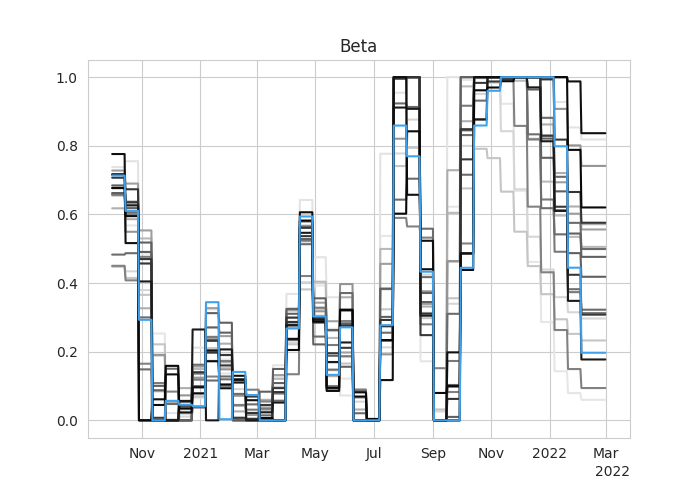

In [23]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, beta[i], color=grey_colors[i])
# sns.lineplot(data=beta,palette=grey_colormap, dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('Beta')
plt.show()

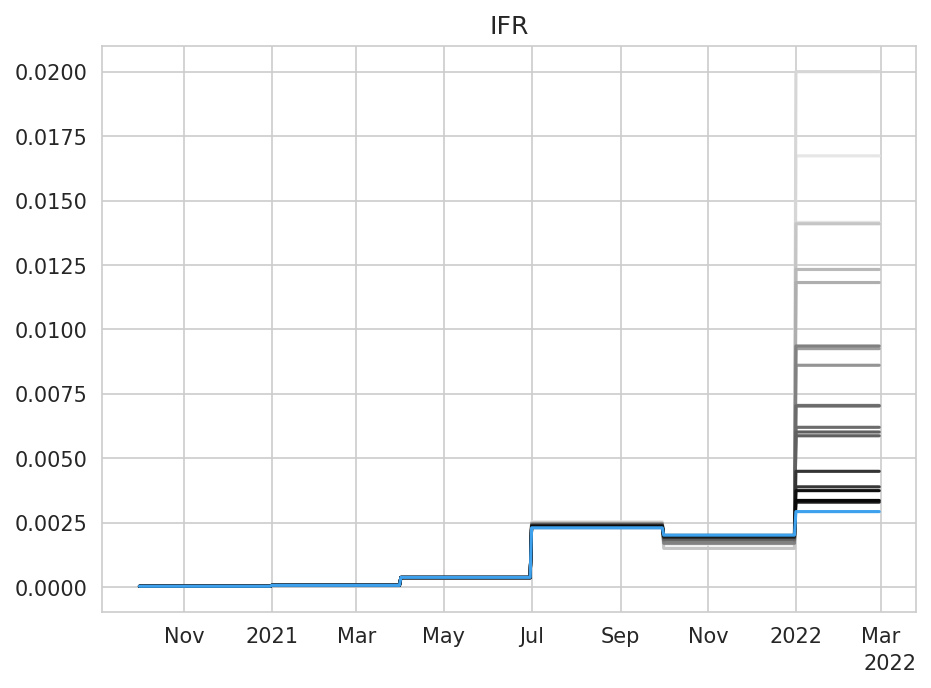

In [16]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, IFR[i], color=grey_colors[i])
# sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('IFR')
plt.show()

In [17]:

err_t = (pred_data['TotalR0'] - smoothed_data["confirmed_smooth"])
err_f = (pred_data['FatalR0'] - smoothed_data["deaths_smooth"])
cost_t = np.linalg.norm(err_t)**2 / np.linalg.norm(smoothed_data["confirmed_smooth"])**2;
cost_f = np.linalg.norm(err_f)**2 / np.linalg.norm(smoothed_data["deaths_smooth"])**2
print(cost_t, cost_f, cost_t+cost_f)
#print(smoothed_data["confirmed_smooth"])

0.0002680398273314627 0.000149633153432649 0.0004176729807641117


In [18]:
print(err_t)
print(format(np.linalg.norm(smoothed_data["confirmed_smooth"])**2, '1.8e'))
print(format(np.linalg.norm(smoothed_data["deaths_smooth"])**2, '1.8e'))

0      -3382.000000
1      -3388.000000
2      -3415.946144
3      -3683.855283
4      -3841.566919
           ...     
511   -17417.232270
512   -18420.140620
513   -19449.678160
514   -20366.403810
515   -21242.122230
Length: 516, dtype: float64
6.73331874e+13
3.84340466e+10
